In [36]:
import json
from PIL import Image
import albumentations
import numpy as np

In [37]:
IMG_RESO = 256
FLIE_PATH = '/home/edlab/dylee/performer_cxr_i2t/i2t_base/checkpoints/epoch=000006_val_bleu_0.306_0.189_0.124_0.087_top_p_thres_0.9_tempr_0.7.json'

In [38]:
rescaler = albumentations.SmallestMaxSize(max_size = IMG_RESO)    # Rescale an image so that minimum side is equal to max_size, keeping the aspect ratio of the initial image.
cropper = albumentations.CenterCrop(height=IMG_RESO, width=IMG_RESO)
preprocessor = albumentations.Compose([
    rescaler,
    cropper,
    ])

def preprocess_image(image_path):
    image = Image.open(image_path)   # PIL format
    if not image.mode == "RGB":
        image = image.convert("RGB")
    image = np.array(image).astype(np.uint8)
    image = preprocessor(image=image)["image"]
    pil_image=Image.fromarray(image)
    return pil_image

In [39]:
with open(FLIE_PATH, 'r') as f:
    decoded_texts = json.load(f)

In [46]:
decoded_texts['52139270']

{'images': '/home/edlab/wcshin/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10003502/s52139270/489faba7-a9dc5f1d-fd7241d6-9638d855-eaa952b1.jpg|/home/edlab/wcshin/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10003502/s52139270/550e6f3b-f008c1d0-8d2dee2a-649b30f4-101a98cc.jpg|',
 'GT_text': 'findings: there are moderate bilateral pleural effusions with overlying atelectasis, underlying consolidation not excluded. mild prominence of the interstitial markings suggests mild pulmonary edema. the cardiac silhouette is mildly enlarged. the mediastinal contours are unremarkable. there is no evidence of pneumothorax. impressions: bilateral pleural effusions, cardiomegaly and mild edema suggest fluid overload, however, given the clinical history, underlying consolidation due to pneumonia cannot be excluded at the lung bases.',
 'gen_text': 'findings: the lungs are well-expanded. there is a retrocardiac opacity obscuring the right heart border. the right heart border is partially obsc

In [47]:
PATHS = decoded_texts['52139270']['images'].split('|')

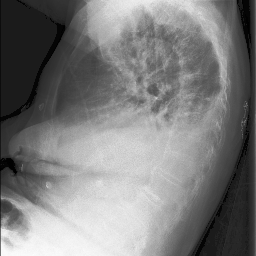

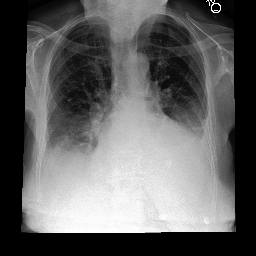

In [48]:
for path in PATHS:
    if path != '':
        pil_image = preprocess_image(path)
        pil_image.show()